In [1]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('D:\Jupyter')
os.getcwd()

'D:\\Jupyter'

In [3]:
df=pd.read_excel('Student Applications & Performance.xlsx')

In [4]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [5]:
replace={1:0,0:1}
df['ATTRITION']=df['RETURNED_2ND_YR'].map(lambda x:replace[x])
df.drop(columns='RETURNED_2ND_YR',inplace=True)
df['ATTRITION'].value_counts()

0    2677
1     723
Name: ATTRITION, dtype: int64

# Exploratory Data Analysis

### **Categorical Variables**

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
25       3
23       3
26       1
24       1
Name: STDNT_AGE, dtype: int64

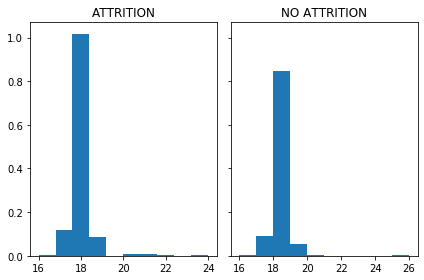

In [6]:
df['ATTRITION'].dtypes
x=df[df['ATTRITION']==1]
y=df[df['ATTRITION']==0]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x['STDNT_AGE'], bins=10,normed=True)
axs[1].hist(y['STDNT_AGE'], bins=10,normed=True)
axs[0].set_title('ATTRITION')
axs[1].set_title('NO ATTRITION')
df['STDNT_AGE'].value_counts()

Most of the students are 18 yrs old. No much difference between attrition & no attrition; variable behaves same. Will drop this one.

In [7]:
x=df.groupby('STDNT_GENDER',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('STDNT_GENDER',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='STDNT_GENDER')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
z

,STDNT_GENDER,Left,Total_Count,Percent
0,F,475,2140,0.221963
1,M,248,1260,0.196825


Female student leaving rate is slightly more than male students, but very less difference. Also, 37% total males 63% females. So, let's drop this one.

,STDNT_BACKGROUND,Left,Total_Count,Percent
4,BGD 5,4,8,0.500000
6,BGD 7,7,19,0.368421
0,BGD 1,477,2082,0.229107
1,BGD 2,24,106,0.226415
7,BGD 8,1,5,0.200000
3,BGD 4,26,139,0.187050
2,BGD 3,170,947,0.179514
5,BGD 6,14,94,0.148936


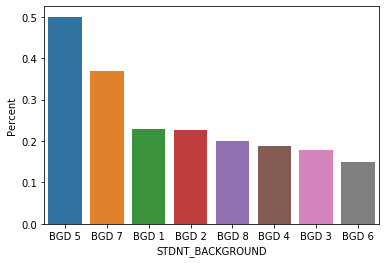

In [8]:
x=df.groupby('STDNT_BACKGROUND',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('STDNT_BACKGROUND',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='STDNT_BACKGROUND')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
display(z)
ax=sns.barplot(x=z['STDNT_BACKGROUND'],y=z['Percent'],data=z)
ax


BGD 5 showing highest attrition but only 8 students are from BGD 5.

In [9]:
x=df.groupby('IN_STATE_FLAG',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('IN_STATE_FLAG',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='IN_STATE_FLAG')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
display(z)

x1=df.groupby('INTERNATIONAL_STS',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y1=df.groupby('INTERNATIONAL_STS',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z1=x1.merge(y1,on='INTERNATIONAL_STS')
z1['Percent']=z1['Left']/z1['Total_Count']
z1=z1.sort_values('Percent',ascending=False)
display(z1)


,IN_STATE_FLAG,Left,Total_Count,Percent
0,N,89,337,0.264095
1,Y,634,3063,0.206987


,INTERNATIONAL_STS,Left,Total_Count,Percent
1,Y,12,27,0.444444
0,N,711,3373,0.210792


    Internations student count is very less which can cause biasness - will consider dropping
    State flag variable seems to have little importance - keeping it

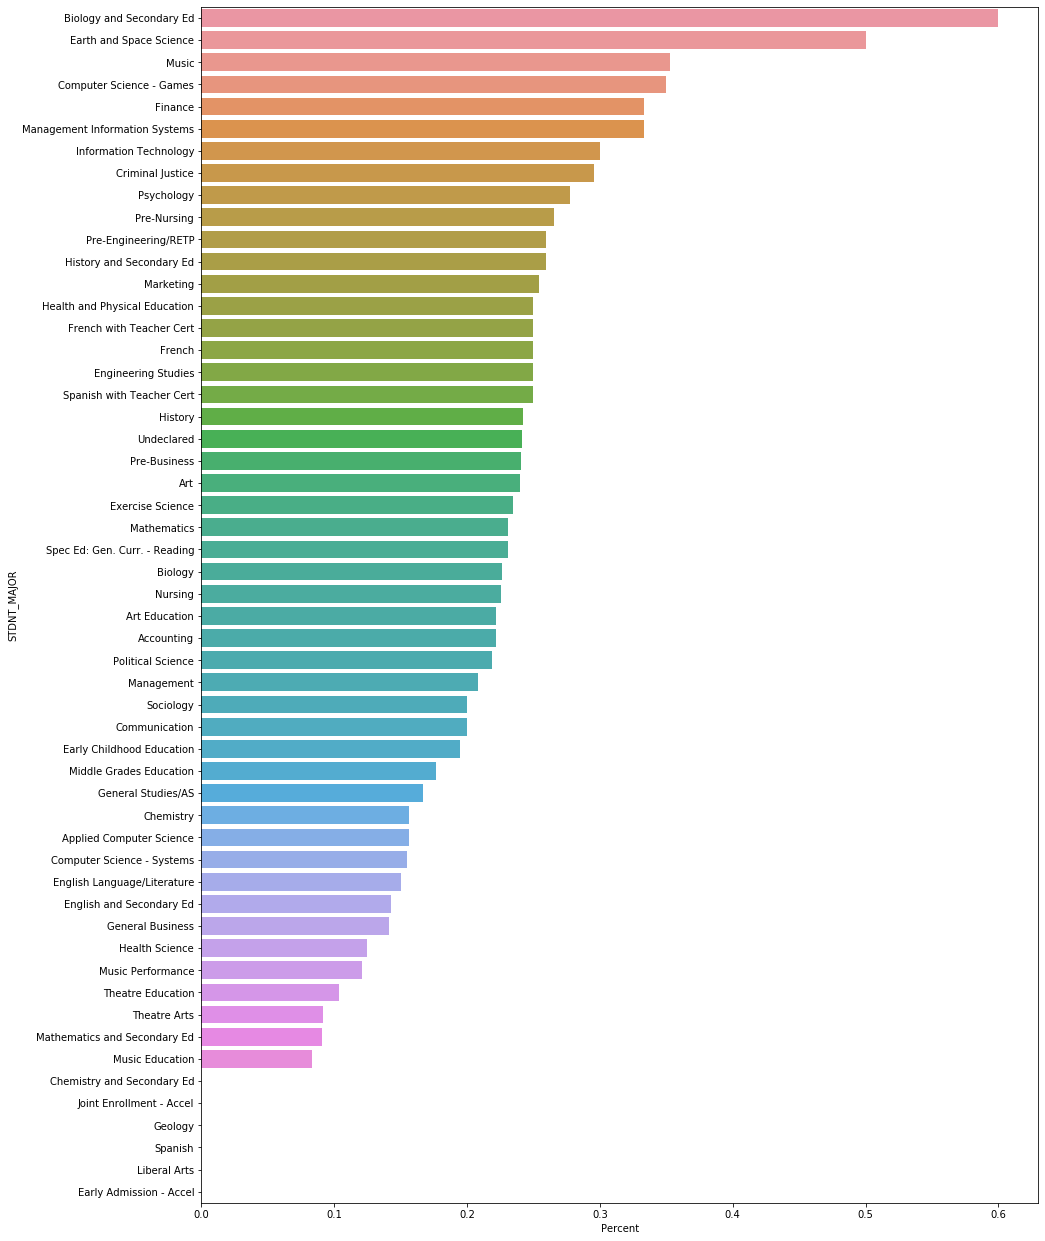

In [10]:
x=df.groupby('STDNT_MAJOR',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('STDNT_MAJOR',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='STDNT_MAJOR')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
plt.figure(figsize=(15,22))
ax=sns.barplot(x=z['Percent'],y=z['STDNT_MAJOR'],data=z)
ax

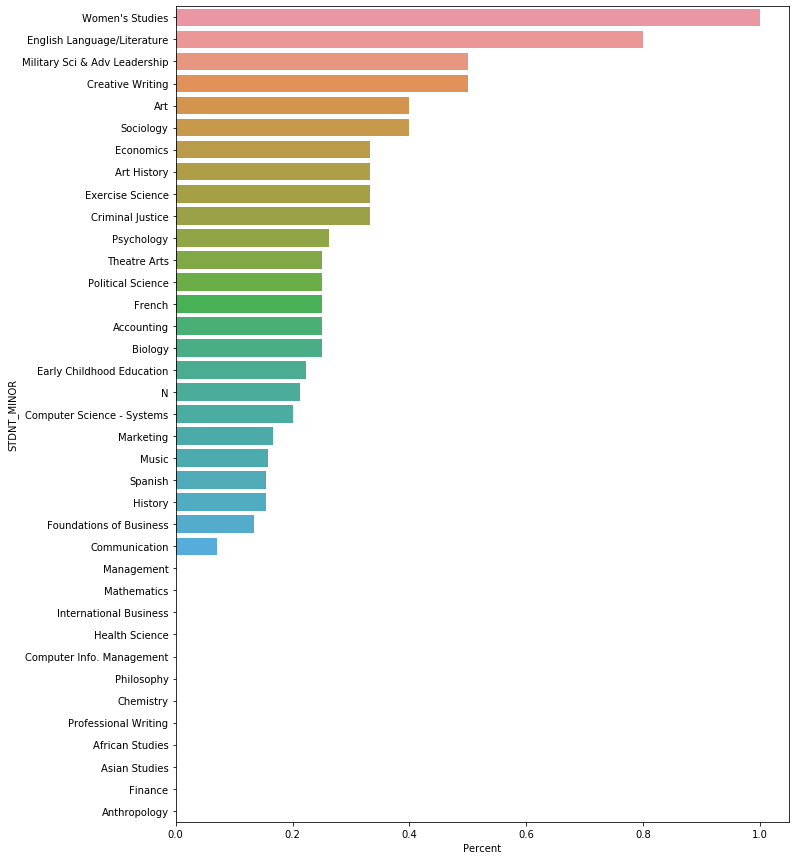

In [11]:
x=df.groupby('STDNT_MINOR',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('STDNT_MINOR',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='STDNT_MINOR')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
plt.figure(figsize=(11,15))
ax=sns.barplot(x=z['Percent'],y=z['STDNT_MINOR'],data=z)
ax

,FIRST_TERM,Left,Total_Count,Percent
4,200908,156,676,0.230769
3,200808,132,581,0.227194
5,201008,140,632,0.221519
0,200508,106,493,0.215010
2,200708,111,521,0.213052
1,200608,78,497,0.156942


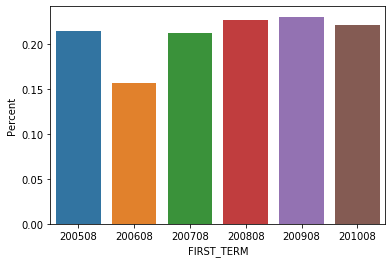

In [12]:
x=df.groupby('FIRST_TERM',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('FIRST_TERM',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='FIRST_TERM')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
display(z)
ax=sns.barplot(x=z['FIRST_TERM'],y=z['Percent'],data=z)
ax

In the year 2006, attrition rate was quite low and increased every year since then. Maybe, this has happend because of COST_OF_ATTEND.

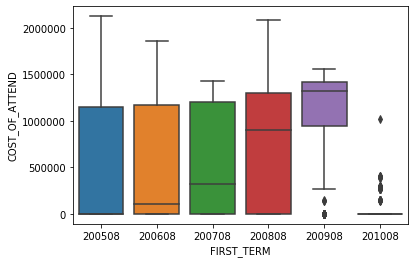

In [13]:
sns.boxplot(x='FIRST_TERM',y='COST_OF_ATTEND',data=df)

As seen above, COST_OF_ATTEND has increased exponentially from year 2005 through 2009. Perhaps, this would have caused increase in attrition. Students might have entered in the first year but could not afford for 2nd year admission. Looks like there are lot of missing values/ zeroes of COST_OF_ATTEND for year 2010.

In [14]:
arts=['Music',
'French',
'French with Teacher Cert',
'Spanish with Teacher Cert',
'Art',
'Art Education',
'Communication',
'English Language/Literature',
'English and Secondary Ed',
'Music Performance',
'Theatre Arts',
'Liberal Arts',
'Spanish'
]
business=['Management Information Systems',
'Finance',
'Marketing',
'Pre-Business',
'Accounting',
'Management',
'General Business'
]
education=['Biology and Secondary Ed',
'Earth and Space Science',
'Computer Science - Games',
'Information Technology',
'Criminal Justice',
'Psychology',
'History and Secondary Ed',
'Pre-Engineering/RETP',
'Health and Physical Education',
'Engineering Studies',
'History',
'Exercise Science',
'Spec Ed: Gen. Curr. - Reading',
'Mathematics',
'Biology',
'Political Science',
'Sociology',
'Early Childhood Education',
'Middle Grades Education',
'General Studies/AS',
'Applied Computer Science',
'Chemistry',
'Computer Science - Systems',
'Health Science',
'Theatre Education',
'Mathematics and Secondary Ed',
'Music Education',
'Chemistry and Secondary Ed',
'Geology'
]

nursing=['Pre-Nursing',
'Nursing'
]

accel=['Early Admission - Accel','Joint Enrollment - Accel']

def fun(x):
    if x in arts:
        return 'arts'
    elif x in business:
            return 'business'
    elif x in education:
            return 'education'
    elif x in nursing:
            return 'nursing'
    elif x in accel:
        return 'accel'
    else:
        return x
        
#a=somefun(accel)
df['STDNT_MAJOR']=df['STDNT_MAJOR'].apply(fun)

In [15]:
df['STDNT_MAJOR'].unique()

array(['Undeclared', 'education', 'arts', 'business', 'nursing', 'accel'],
      dtype=object)

As there were lot of major names, we reduced and substituted main stream names. Same goes for all course names as well.

In [16]:
df['CORE_COURSE_NAME_1_F']=df['CORE_COURSE_NAME_1_F'].str.split(' ').str[0]
df['CORE_COURSE_NAME_2_F']=df['CORE_COURSE_NAME_2_F'].str.split(' ').str[0]
df['CORE_COURSE_NAME_3_F']=df['CORE_COURSE_NAME_3_F'].str.split(' ').str[0]
df['CORE_COURSE_NAME_4_F']=df['CORE_COURSE_NAME_4_F'].str.split(' ').str[0]
df['CORE_COURSE_NAME_5_F']=df['CORE_COURSE_NAME_5_F'].str.split(' ').str[0]
df['CORE_COURSE_NAME_6_F']=df['CORE_COURSE_NAME_6_F'].str.split(' ').str[0]

df['CORE_COURSE_NAME_1_S']=df['CORE_COURSE_NAME_1_S'].str.split(' ').str[0]
df['CORE_COURSE_NAME_2_S']=df['CORE_COURSE_NAME_2_S'].str.split(' ').str[0]
df['CORE_COURSE_NAME_3_S']=df['CORE_COURSE_NAME_3_S'].str.split(' ').str[0]
df['CORE_COURSE_NAME_4_S']=df['CORE_COURSE_NAME_4_S'].str.split(' ').str[0]
df['CORE_COURSE_NAME_5_S']=df['CORE_COURSE_NAME_5_S'].str.split(' ').str[0]
df['CORE_COURSE_NAME_6_S']=df['CORE_COURSE_NAME_6_S'].str.split(' ').str[0]


In [17]:
arts=['ARTH',
'MUSC',
'THEA'
]

language=['ARAB',
'ENGL',
'FREN',
'GERM',
'JAPN',
'LATN',
'SPAN'
]

science=['ASTR',
'BIOL',
'CHEM',
'CPSC',
'ENVS',
'GEOL',
'MATH',
'PHYS',
'STAT'
]

so_sci=['ANTH',
'COMM',
'ECON',
'GEOG',
'HIST',
'LEAD',
'POLS',
'PSYC',
'SOCI',
'U.S.'
]

def fun(x):
    if x in arts:
        return 'arts'
    elif x in language:
        return 'language'
    elif x in science:
        return 'science'
    elif x in so_sci:
        return 'so_sci'
    else:
        return x
    
df['CORE_COURSE_NAME_1_F']=df['CORE_COURSE_NAME_1_F'].apply(fun)
df['CORE_COURSE_NAME_2_F']=df['CORE_COURSE_NAME_2_F'].apply(fun)
df['CORE_COURSE_NAME_3_F']=df['CORE_COURSE_NAME_3_F'].apply(fun)
df['CORE_COURSE_NAME_4_F']=df['CORE_COURSE_NAME_4_F'].apply(fun)
df['CORE_COURSE_NAME_5_F']=df['CORE_COURSE_NAME_5_F'].apply(fun)
df['CORE_COURSE_NAME_6_F']=df['CORE_COURSE_NAME_6_F'].apply(fun)

df['CORE_COURSE_NAME_1_S']=df['CORE_COURSE_NAME_1_S'].apply(fun)
df['CORE_COURSE_NAME_2_S']=df['CORE_COURSE_NAME_2_S'].apply(fun)
df['CORE_COURSE_NAME_3_S']=df['CORE_COURSE_NAME_3_S'].apply(fun)
df['CORE_COURSE_NAME_4_S']=df['CORE_COURSE_NAME_4_S'].apply(fun)
df['CORE_COURSE_NAME_5_S']=df['CORE_COURSE_NAME_5_S'].apply(fun)
df['CORE_COURSE_NAME_6_S']=df['CORE_COURSE_NAME_6_S'].apply(fun)



In [18]:
print(df['CORE_COURSE_NAME_1_S'].unique())

['science' 'so_sci' 'language' 'arts' 'ITDS' nan]


education     1606
arts           507
Undeclared     460
business       448
nursing        341
accel           38
Name: STDNT_MAJOR, dtype: int64
______________________________________________
  STDNT_MAJOR  Left  Total_Count   Percent
5     nursing    84          341  0.246334
0  Undeclared   111          460  0.241304
3    business   101          448  0.225446
4   education   347         1606  0.216065
2        arts    80          507  0.157791
1       accel     0           38  0.000000


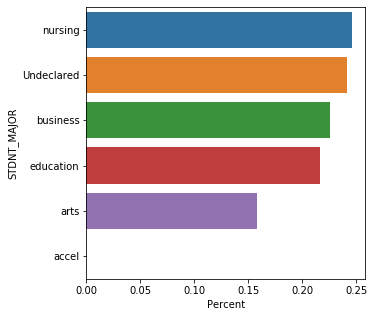

In [19]:
x=df.groupby('STDNT_MAJOR',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('STDNT_MAJOR',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='STDNT_MAJOR')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
plt.figure(figsize=(5,5))
print(df['STDNT_MAJOR'].value_counts())
print('______________________________________________')
sns.barplot(x=z['Percent'],y=z['STDNT_MAJOR'],data=z)
print(z)

Students who are opting nursing stream tend to leave more likely. Whereas, who are opting for arts tend to leave less likely. Interestingly, not a single student is leaving who has joint enrolment or early admission. However, total count is 38 of these students.

In [20]:
a=df[df['ATTRITION']==1]
b=df[df['ATTRITION']==0]

a1=a.groupby('CORE_COURSE_NAME_1_F').size()
a2=a.groupby('CORE_COURSE_NAME_2_F').size()
a3=a.groupby('CORE_COURSE_NAME_3_F').size()
a4=a.groupby('CORE_COURSE_NAME_4_F').size()
a5=a.groupby('CORE_COURSE_NAME_5_F').size()
a6=a.groupby('CORE_COURSE_NAME_6_F').size()



b1=b.groupby('CORE_COURSE_NAME_1_F').size()
b2=b.groupby('CORE_COURSE_NAME_2_F').size()
b3=b.groupby('CORE_COURSE_NAME_3_F').size()
b4=b.groupby('CORE_COURSE_NAME_4_F').size()
b5=b.groupby('CORE_COURSE_NAME_5_F').size()
b6=b.groupby('CORE_COURSE_NAME_6_F').size()

x=a1+a2+a3+a4+a5+a6
x=pd.Series(x,name='count1')
x=x.to_frame()
x.reset_index(level=0, inplace=True)
x.rename(columns={'CORE_COURSE_NAME_1_F':'course_name'},inplace=True)


y=b1+b2+b3+b4+b5+b6
y=pd.Series(y,name='count2')
y=y.to_frame()
y.reset_index(level=0, inplace=True)
y.rename(columns={'index':'course_name'},inplace=True)



z=x.merge(y,on='course_name')
z['left_percent']=z['count1']/(z['count1']+z['count2'])
z=z.sort_values('left_percent')
z1=z.copy()

In [21]:
a=df[df['ATTRITION']==1]
b=df[df['ATTRITION']==0]

a1=a.groupby('CORE_COURSE_NAME_1_S').size()
a2=a.groupby('CORE_COURSE_NAME_2_S').size()
a3=a.groupby('CORE_COURSE_NAME_3_S').size()
a4=a.groupby('CORE_COURSE_NAME_4_S').size()
a5=a.groupby('CORE_COURSE_NAME_5_S').size()
a6=a.groupby('CORE_COURSE_NAME_6_S').size()
add=pd.Series({'arts':0})
a6=a6.append(add)

b1=b.groupby('CORE_COURSE_NAME_1_S').size()
b2=b.groupby('CORE_COURSE_NAME_2_S').size()
b3=b.groupby('CORE_COURSE_NAME_3_S').size()
b4=b.groupby('CORE_COURSE_NAME_4_S').size()
b5=b.groupby('CORE_COURSE_NAME_5_S').size()
b6=b.groupby('CORE_COURSE_NAME_6_S').size()

x=a1+a2+a3+a4+a5+a6
x=pd.Series(x,name='count1')
x=x.to_frame()
x.reset_index(level=0, inplace=True)
x.rename(columns={'index':'course_name'},inplace=True)

y=b1+b2+b3+b4+b5+b6
y=pd.Series(y,name='count2')
y=y.to_frame()
y.reset_index(level=0, inplace=True)
y.rename(columns={'CORE_COURSE_NAME_1_S':'course_name'},inplace=True)

z=x.merge(y,on='course_name')
z['left_percent']=z['count1']/(z['count1']+z['count2'])
z=z.sort_values('left_percent')
z2=z.copy()

Text(0.5, 1.0, 'second term')

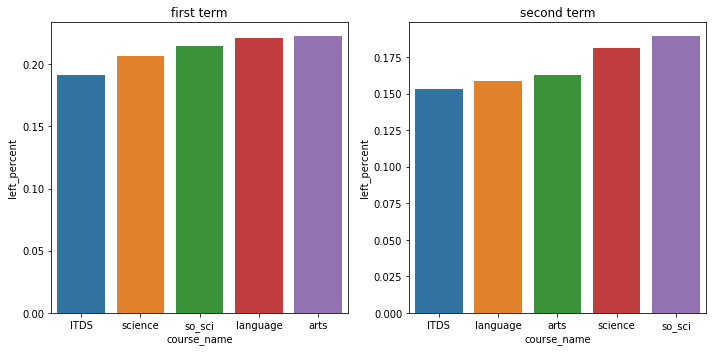

In [22]:
fig, axes=plt.subplots(1,2,figsize=(10,5),tight_layout=True)
sns.barplot(y=z1['left_percent'],x=z1['course_name'],data=z1,ax=axes[0])
sns.barplot(y=z2['left_percent'],x=z2['course_name'],data=z2,ax=axes[1])
axes[0].set_title('first term')
axes[1].set_title('second term')

Here, we are comparing total attrition percentage by each couse category across first semester & second semester Students who choose courses that fall under language & arts in first sem tend to have higher attrion than rest of the courses chosen in 1st sem. Whereas, who choose courses that fall under science & social science tend to have higher attrition than rest of the courses chosen in 2nd sem.

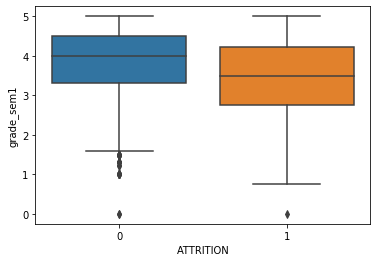

In [23]:
#df['grade_sem1']
#A=5
#B=4
#C=3
#D=2
#F=1
#NOT REP = 0
#INCOMP = 0

def fun(x):
    if x=='A':
        return 5
    elif x=='B':
        return 4
    elif x=='C':
        return 3
    elif x=='D':
        return 2
    elif x=='F':
        return 1
    elif x=='NOT REP' or x=='INCOMPL':
        return 0

df['g1']=round(df['CORE_COURSE_GRADE_1_F'].apply(fun),1)
df['g2']=round(df['CORE_COURSE_GRADE_2_F'].apply(fun),1)
df['g3']=round(df['CORE_COURSE_GRADE_3_F'].apply(fun),1)
df['g4']=round(df['CORE_COURSE_GRADE_4_F'].apply(fun),1)
df['g5']=round(df['CORE_COURSE_GRADE_5_F'].apply(fun),1)
df['g6']=round(df['CORE_COURSE_GRADE_6_F'].apply(fun),1)


df.loc[(df['g2'].isnull()),'g2']=round(df['g1'],1)
df.loc[(df['g3'].isnull()),'g3']=round((df['g1']+df['g2'])/2,1)
df.loc[(df['g4'].isnull()),'g4']=round((df['g1']+df['g2']+df['g3'])/3,1)
df.loc[(df['g5'].isnull()),'g5']=round((df['g1']+df['g2']+df['g3']+df['g4'])/4,1)
df.loc[(df['g6'].isnull()),'g6']=round((df['g1']+df['g2']+df['g3']+df['g4']+df['g5'])/5,1)


df['grade_sem1']=(df['g1']+df['g2']+df['g3']+df['g4']+df['g5']+df['g6'])/6




#df['grade_sem1'].unique().shape

sns.boxplot(x=df['ATTRITION'],y=df['grade_sem1'],data=df)



All 1st sem courses grades have been aggregated and taken the average. More attrition is seen if grades are low.

In [24]:
df.drop(columns=['g1','g2','g3','g4','g5','g6'],inplace=True)

In [25]:
def fun(x):
    if x=='A':
        return 5
    elif x=='B':
        return 4
    elif x=='C':
        return 3
    elif x=='D':
        return 2
    elif x=='F':
        return 1
    elif x=='NOT REP' or x=='INCOMPL':
        return 0

df['g1']=round(df['CORE_COURSE_GRADE_1_S'].apply(fun),1)
df['g2']=round(df['CORE_COURSE_GRADE_2_S'].apply(fun),1)
df['g3']=round(df['CORE_COURSE_GRADE_3_S'].apply(fun),1)
df['g4']=round(df['CORE_COURSE_GRADE_4_S'].apply(fun),1)
df['g5']=round(df['CORE_COURSE_GRADE_5_S'].apply(fun),1)
df['g6']=round(df['CORE_COURSE_GRADE_6_S'].apply(fun),1)


#df['g1'].fillna((df['g1'].mean()),inplace=True)
df.loc[(df['g2'].isnull()),'g2']=round(df['g1'],1)
df.loc[(df['g3'].isnull()),'g3']=round((df['g1']+df['g2'])/2,1)
df.loc[(df['g4'].isnull()),'g4']=round((df['g1']+df['g2']+df['g3'])/3,1)
df.loc[(df['g5'].isnull()),'g5']=round((df['g1']+df['g2']+df['g3']+df['g4'])/4,1)
df.loc[(df['g6'].isnull()),'g6']=round((df['g1']+df['g2']+df['g3']+df['g4']+df['g5'])/5,1)

df['grade_sem2']=(df['g1']+df['g2']+df['g3']+df['g4']+df['g5']+df['g6'])/6


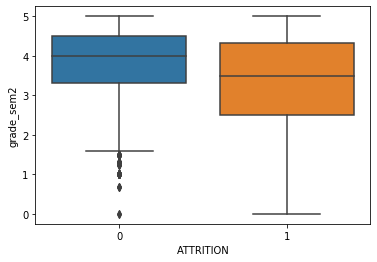

In [26]:
sns.boxplot(x=df['ATTRITION'],y=df['grade_sem2'],data=df)

Overall performace for sem 1 & sem 2 created for ease of analysis

In [27]:
df.drop(columns=['g1','g2','g3','g4','g5','g6'],inplace=True)

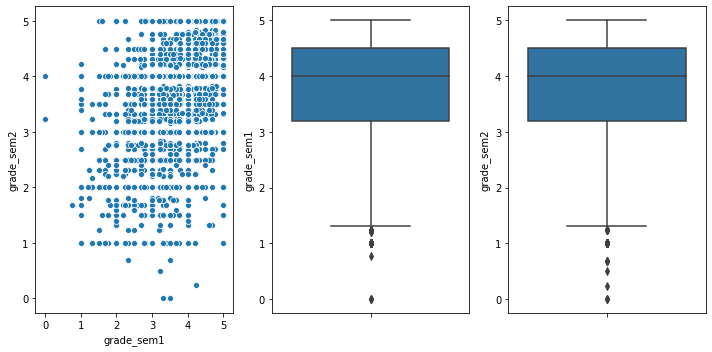

In [28]:
fig, axes=plt.subplots(1,3,figsize=(10,5),tight_layout=True)
sns.scatterplot(x=df['grade_sem1'],y=df['grade_sem2'],data=df,ax=axes[0])
sns.boxplot(y=df['grade_sem1'],data=df,ax=axes[1])
sns.boxplot(y=df['grade_sem2'],data=df,ax=axes[2])


In [29]:
df.loc[(df['grade_sem2'].isnull()),'grade_sem2']=df['grade_sem1']

replacing sem2 missing grades with corresponding sem1 overall grades that we derived, since both seems to be correlated.

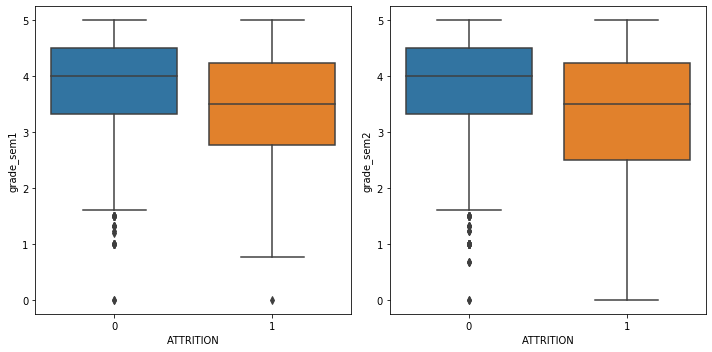

In [30]:
fig, axes=plt.subplots(1,2,figsize=(10,5),tight_layout=True)
sns.boxplot(x=df['ATTRITION'],y=df['grade_sem1'],data=df,ax=axes[0])
sns.boxplot(x=df['ATTRITION'],y=df['grade_sem2'],data=df,ax=axes[1])


There is significant difference in attrition rate by grades. Also, average 2nd sem grade points have more skewness whereas less in average of 1st sem

In [31]:
x=df.groupby('HOUSING_STS',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('HOUSING_STS',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='HOUSING_STS')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
z


,HOUSING_STS,Left,Total_Count,Percent
1,On Campus,334,1419,0.235377
0,Off Campus,389,1981,0.196365


Housing status seems to have little contribution in attrition

In [32]:
df['HIGH_SCHL_NAME']=df['HIGH_SCHL_NAME'].str.split(' ').str[1]

In [33]:
df.loc[(df['HIGH_SCHL_NAME'].isnull()),'HIGH_SCHL_NAME']=0

In [34]:
df['HIGH_SCHL_NAME']=df['HIGH_SCHL_NAME'].map(lambda x: int(x))

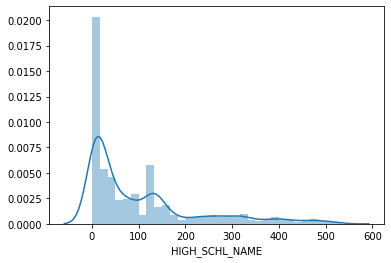

In [35]:
sns.distplot(df['HIGH_SCHL_NAME'])

Graph is very skewed towards right; means some schools are dominating in terms of their students going to the university. If we consider this variable as a categorical in the model, then it may cause distortion as very less count we have most of the schools. So, will be dropping this variable.

In [36]:
print(df['FATHER_HI_EDU_CD'].value_counts())
print(df['MOTHER_HI_EDU_CD'].value_counts())

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64
3.0    1500
2.0    1223
4.0     117
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64


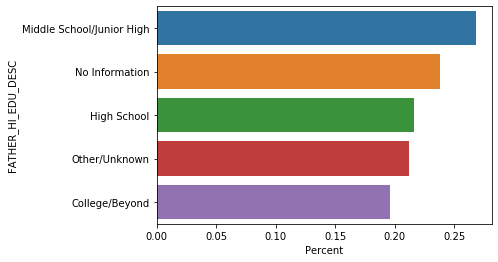

In [37]:
x=df.groupby('FATHER_HI_EDU_DESC',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('FATHER_HI_EDU_DESC',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='FATHER_HI_EDU_DESC')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
#plt.figure(figsize=(5,5))
sns.barplot(x=z['Percent'],y=z['FATHER_HI_EDU_DESC'],data=z)


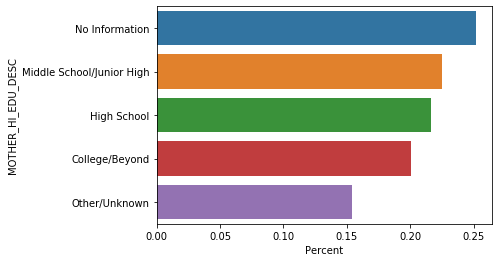

In [38]:
x=df.groupby('MOTHER_HI_EDU_DESC',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('MOTHER_HI_EDU_DESC',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='MOTHER_HI_EDU_DESC')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
#plt.figure(figsize=(5,5))
sns.barplot(x=z['Percent'],y=z['MOTHER_HI_EDU_DESC'],data=z)


In [39]:
print(df[['FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD']].median())

FATHER_HI_EDU_CD    3.0
MOTHER_HI_EDU_CD    3.0
dtype: float64


In [40]:
df.groupby('MOTHER_HI_EDU_DESC').agg({'MOTHER_HI_EDU_CD':'median'}).sort_values('MOTHER_HI_EDU_CD')

,MOTHER_HI_EDU_CD
MOTHER_HI_EDU_DESC,
Middle School/Junior High,1.0
High School,2.0
College/Beyond,3.0
Other/Unknown,4.0
No Information,NaN


In [41]:
df.loc[df['MOTHER_HI_EDU_CD'].isnull(),'MOTHER_HI_EDU_CD']=4
df.loc[df['FATHER_HI_EDU_CD'].isnull(),'FATHER_HI_EDU_CD']=4

In [42]:
df['parents_edu_cd']=round((df['MOTHER_HI_EDU_CD']+df['FATHER_HI_EDU_CD'])/2,0)

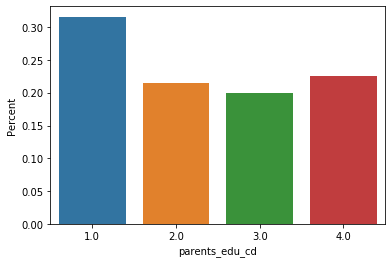

In [43]:
x=df.groupby('parents_edu_cd',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('parents_edu_cd',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='parents_edu_cd')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)
#plt.figure(figsize=(5,5))
sns.barplot(y=z['Percent'],x=z['parents_edu_cd'],data=z)


In [44]:
def fun(x):
    if x==1:
        return 'Middle School/Junior High'
    elif x==2:
        return 'High School'
    elif x==3:
        return 'College/Beyond'
    else:
        return 'Unknown'
df['parents_edu_desc']=df['parents_edu_cd'].apply(fun)

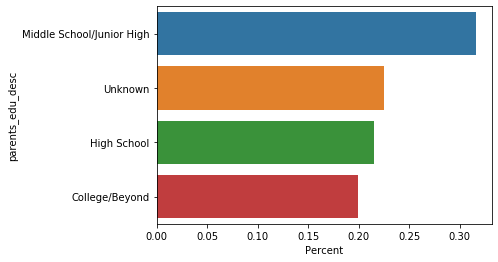

In [45]:
x=df.groupby('parents_edu_desc',as_index=False).agg({'ATTRITION':'sum'}).rename(columns={'ATTRITION':'Left'})
y=df.groupby('parents_edu_desc',as_index=False).agg({'ATTRITION':'count'}).rename(columns={'ATTRITION':'Total_Count'})
z=x.merge(y,on='parents_edu_desc')
z['Percent']=z['Left']/z['Total_Count']
z=z.sort_values('Percent',ascending=False)

sns.barplot(x=z['Percent'],y=z['parents_edu_desc'],data=z)


Speculating - Parents education impacts family contribution towards course fees which impacts early attrion. Will validate later as family contribution variable needs to be cleaned.

In [46]:
df['DEGREE_GROUP_DESC'].value_counts()

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

Bachelors are dominating in the university. Will need to drop the variable.

In [47]:
#dropping some variables which were transformed to derived variables.

drp=['CORE_COURSE_GRADE_1_F',
'CORE_COURSE_GRADE_2_F',
'CORE_COURSE_GRADE_3_F',
'CORE_COURSE_GRADE_4_F',
'CORE_COURSE_GRADE_5_F',
'CORE_COURSE_GRADE_6_F',
'CORE_COURSE_GRADE_1_S',
'CORE_COURSE_GRADE_2_S',
'CORE_COURSE_GRADE_3_S',
'CORE_COURSE_GRADE_4_S',
'CORE_COURSE_GRADE_5_S',
'CORE_COURSE_GRADE_6_S',
'FATHER_HI_EDU_CD',
'FATHER_HI_EDU_DESC',
'MOTHER_HI_EDU_CD',
'MOTHER_HI_EDU_DESC'
]

df.drop(columns=drp,inplace=True)

### **Numerical Variables**

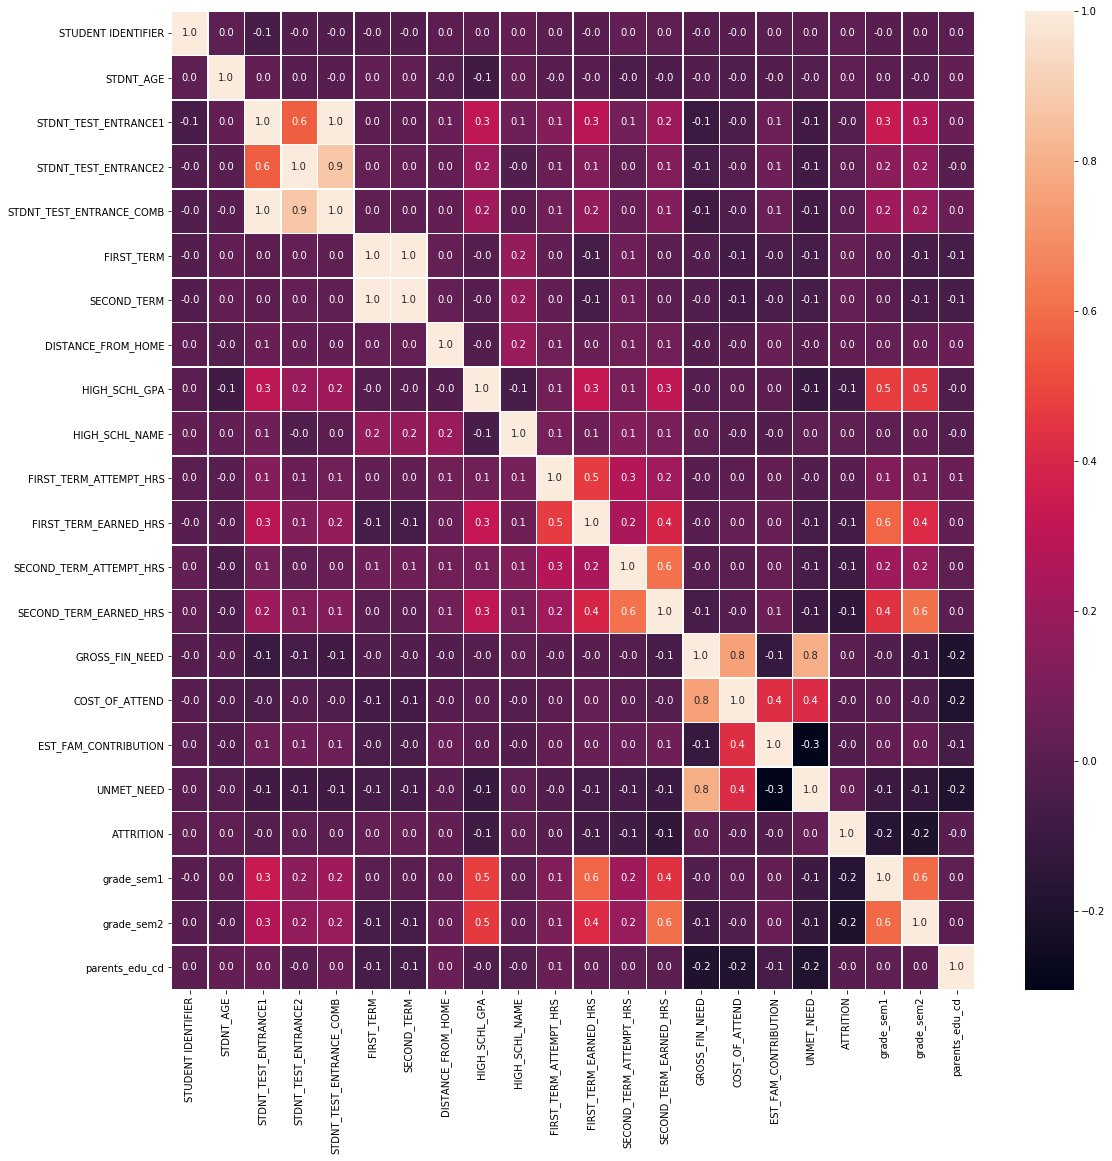

In [48]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

1. STDNT_TEST_ENTRANCE1 has 2294 missing values. And, there is strong relationship between entrance 2 & entrance COMB. So, will drop entrance 1 & 2 and will consider only **entrance comb**.
2. Second term column has only year so let's drop it and keep only **first term** column.
3. There is little relationship between 1st term earned hrs & attempt hrs), also between 2nd term earned hrs & attemp hrs.
4. Financial indicators look connected to each other.
5. Grades of both semester are correlated with HIGH_SCHL_GPA & their respective Semesters earned hrs. Moreover, sem1 & sem2 grades also have relationship.



###### Checking out relation of all numerical variables with target variable.

Text(0.5, 1.0, 'UNMET_NEED')

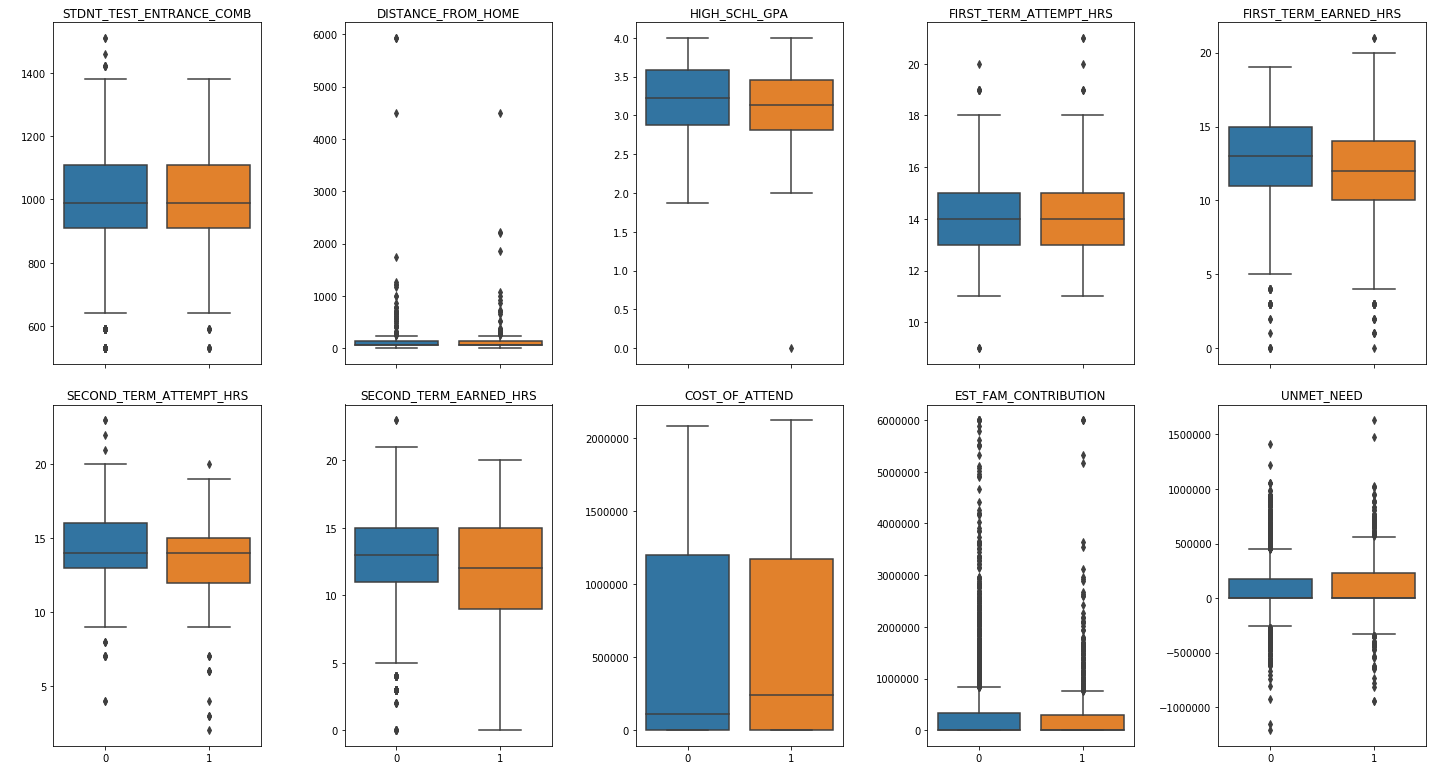

In [49]:
fig, axes = plt.subplots(2,5,figsize=(20, 11),sharex=True,tight_layout=True)
sns.boxplot(x='ATTRITION',y='STDNT_TEST_ENTRANCE_COMB',data=df,ax=axes[0,0])
sns.boxplot(x='ATTRITION',y='DISTANCE_FROM_HOME',data=df,orient='v',ax=axes[0,1])
sns.boxplot(x='ATTRITION',y='HIGH_SCHL_GPA',data=df,orient='v',ax=axes[0,2])
sns.boxplot(x='ATTRITION',y='FIRST_TERM_ATTEMPT_HRS',data=df,orient='v',ax=axes[0,3])
sns.boxplot(x='ATTRITION',y='FIRST_TERM_EARNED_HRS',data=df,orient='v',ax=axes[0,4])
sns.boxplot(x='ATTRITION',y='SECOND_TERM_ATTEMPT_HRS',data=df,orient='v',ax=axes[1,0])
sns.boxplot(x='ATTRITION',y='SECOND_TERM_EARNED_HRS',data=df,orient='v',ax=axes[1,1])
sns.boxplot(x='ATTRITION',y='COST_OF_ATTEND',data=df,orient='v',ax=axes[1,2])
sns.boxplot(x='ATTRITION',y='EST_FAM_CONTRIBUTION',data=df,orient='v',ax=axes[1,3])
sns.boxplot(x='ATTRITION',y='UNMET_NEED',data=df,orient='v',ax=axes[1,4])
#sns.boxplot(x='ATTRITION',y='GROSS_FIN_NEED',data=df,orient='v',ax=axes[1,3])


plt.setp(axes[:],xlabel=' ')
plt.setp(axes[:],ylabel=' ')
axes[0,0].set_title('STDNT_TEST_ENTRANCE_COMB')
axes[0,1].set_title('DISTANCE_FROM_HOME')
axes[0,2].set_title('HIGH_SCHL_GPA')
axes[0,3].set_title('FIRST_TERM_ATTEMPT_HRS')
axes[0,4].set_title('FIRST_TERM_EARNED_HRS')
axes[1,0].set_title('SECOND_TERM_ATTEMPT_HRS')
axes[1,1].set_title('SECOND_TERM_EARNED_HRS')
axes[1,2].set_title('COST_OF_ATTEND')
axes[1,3].set_title('EST_FAM_CONTRIBUTION')
axes[1,4].set_title('UNMET_NEED')



    1. STDNT_TEST_ENTRANCE_COMB - doesn't seem to be significant.
    2. DISTANCE_FROM_HOME       - data is skewed and lot of outliers
    3. HIGH_SCHL_GPA            - little significance
    4. FIRST_TERM_ATTEMPT_HRS   - doesn't seem to be significant.
    5. FIRST_TERM_EARNED_HRS    - variable has some contribution towards attirtion rate.
    6. SECOND_TERM_ATTEMPT_HRS  - as this is correlated with SECOND_TERM_EARNED_HRS; we will discard SECOND_TERM_ATTEMPT_HRS and keep SECOND_TERM_EARNED_HRS. Because, SECOND_TERM_ATTEMPT_HRS has more outliers than SECOND_TERM_EARNED_HRS.
    7. COST_OF_ATTEND           - 50% data has very low cost which cant be true. Need to analyse more.
    8. EST_FAM_CONTRIBUTION     - Lot of outliers. Data cleaning is required.
    9. UNMET_NEED               - Lot of outliers and negative values. Data cleaning is required.

In [50]:
df.groupby('ATTRITION')['DISTANCE_FROM_HOME'].describe()

,count,mean,std,min,25%,50%,75%,max
ATTRITION,,,,,,,,
0,2662.0,96.506762,235.583832,0.0,69.0,69.0,138.0,5932.0
1,713.0,112.214586,233.494713,0.0,69.0,69.0,138.0,4501.0


In [51]:
iqr=df['DISTANCE_FROM_HOME'].quantile(.75)-df['DISTANCE_FROM_HOME'].quantile(.25)
q3=df['DISTANCE_FROM_HOME'].quantile(.75)
edge=q3+(1.5*iqr)
df[df['DISTANCE_FROM_HOME']<edge][['DISTANCE_FROM_HOME']].sort_values('DISTANCE_FROM_HOME',ascending=False).head(1)


,DISTANCE_FROM_HOME
921,237.0


In [52]:
df.loc[df['DISTANCE_FROM_HOME']>237,'DISTANCE_FROM_HOME']=237

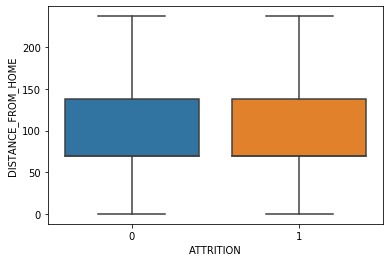

In [53]:
sns.boxplot(x='ATTRITION',y='DISTANCE_FROM_HOME',data=df)

DISTANCE_FROM_HOME doesn't turn out to be significant.

In [54]:
print(len(df[df['COST_OF_ATTEND']==0]))
print(len(df[df['EST_FAM_CONTRIBUTION']==0]))
print(len(df[df['UNMET_NEED']==0]))
print(len(df[df['GROSS_FIN_NEED']==0]))

1679
2112
1805
2237


In the provided spreadsheet these columns are filled with dash '-' whereas python has taken it as 0 while loading the dataset. Implicitly,these could be missing values.

# Data Preparation

#### **Replaceing 0 with null values for financial indicators and replacing negative values with 0 for UNMET_NEED.**

In [55]:
def fun(x):
    if x==0:
        return None
    elif x<0:
        return 0
    else:
        return x

df['GROSS_FIN_NEED']=df['GROSS_FIN_NEED'].apply(fun)
df['UNMET_NEED']=df['UNMET_NEED'].apply(fun)
df['COST_OF_ATTEND']=df['COST_OF_ATTEND'].apply(fun)
df['EST_FAM_CONTRIBUTION']=df['EST_FAM_CONTRIBUTION'].apply(fun)


In [56]:
print(len(df[df['COST_OF_ATTEND']==0]))
print(len(df[df['EST_FAM_CONTRIBUTION']==0]))
print(len(df[df['UNMET_NEED']==0]))
print(len(df[df['GROSS_FIN_NEED']==0]))


0
0
558
0


We have cleaned some financial indicators. Now let's take a loog again on visuals.

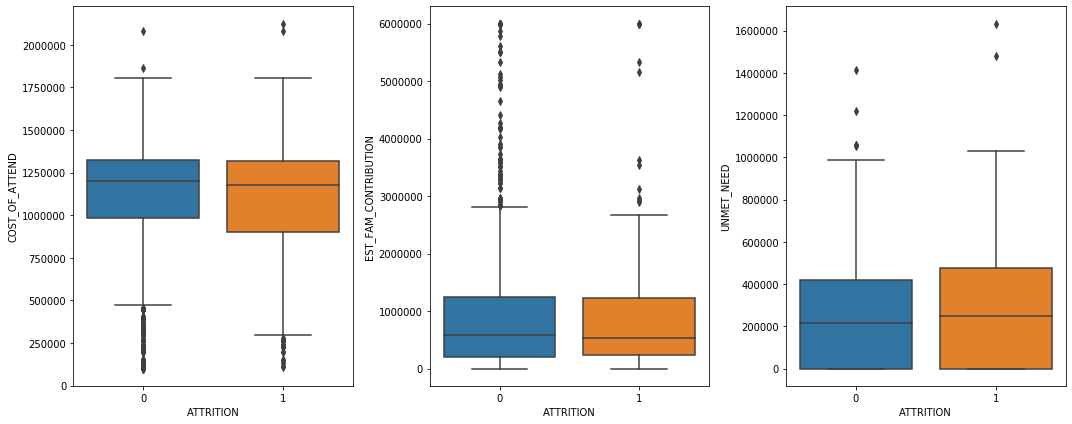

In [57]:
fig, axes = plt.subplots(1,3,figsize=(15, 6),sharex=True,tight_layout=True)
sns.boxplot(x='ATTRITION',y='COST_OF_ATTEND',data=df,orient='v',ax=axes[0])
sns.boxplot(x='ATTRITION',y='EST_FAM_CONTRIBUTION',data=df,orient='v',ax=axes[1])
sns.boxplot(x='ATTRITION',y='UNMET_NEED',data=df,orient='v',ax=axes[2])


#### **Anomaly detection and dealing with outliers**

In [58]:
print(len(df[(df['COST_OF_ATTEND'].isnull())&((df['EST_FAM_CONTRIBUTION'].notnull()))]))
print(len(df[(df['COST_OF_ATTEND'].isnull())&((df['UNMET_NEED'].notnull()))]))
print(len(df[(df['COST_OF_ATTEND'].isnull())&((df['GROSS_FIN_NEED'].notnull()))]))
print(len(df[(df['COST_OF_ATTEND']<df['EST_FAM_CONTRIBUTION'])]))
print(len(df[(df['COST_OF_ATTEND']<df['UNMET_NEED'])]))
print(len(df[(df['COST_OF_ATTEND']<df['GROSS_FIN_NEED'])]))


64
5
0
330
0
0


In [59]:
df.loc[(df['COST_OF_ATTEND']<df['EST_FAM_CONTRIBUTION']),'EST_FAM_CONTRIBUTION']=df['COST_OF_ATTEND']
df.loc[(df['COST_OF_ATTEND'].isnull()),'EST_FAM_CONTRIBUTION']=None
df.loc[(df['COST_OF_ATTEND'].isnull()),'UNMET_NEED']=None


In [60]:
print(len(df[(df['EST_FAM_CONTRIBUTION']+df['UNMET_NEED'])>df['COST_OF_ATTEND']]))
print(len(df[(df['EST_FAM_CONTRIBUTION']+df['GROSS_FIN_NEED'])>df['COST_OF_ATTEND']]))


0
0


In [61]:
print(len(df[df['COST_OF_ATTEND']==df['GROSS_FIN_NEED']+df['EST_FAM_CONTRIBUTION']]))
print(len(df[(df['EST_FAM_CONTRIBUTION'].notnull())&(df['GROSS_FIN_NEED'].notnull())&(df['UNMET_NEED'].notnull())]))
print(len(df[(df['GROSS_FIN_NEED']<df['COST_OF_ATTEND'])&(df['EST_FAM_CONTRIBUTION'].isnull())&(df['GROSS_FIN_NEED'].notnull())]))


874
863
11


1. Difference is 874 - 863 = 11
2. Let's apply this formula to substitue 11 NULL VALUES of EST_FAM_CONTRIBUTION

In [62]:
df.loc[(df['GROSS_FIN_NEED']<=df['COST_OF_ATTEND'])&(df['EST_FAM_CONTRIBUTION'].isnull())&(df['GROSS_FIN_NEED'].notnull()),'EST_FAM_CONTRIBUTION']=df['COST_OF_ATTEND']-df['GROSS_FIN_NEED']

In [63]:
df.loc[(df['COST_OF_ATTEND']>=df['EST_FAM_CONTRIBUTION'])&(df['COST_OF_ATTEND'].notnull())&(df['EST_FAM_CONTRIBUTION'].notnull())&(df['GROSS_FIN_NEED'].isnull()),'GROSS_FIN_NEED']=df['COST_OF_ATTEND']-df['EST_FAM_CONTRIBUTION']

In [64]:
df.loc[(df['EST_FAM_CONTRIBUTION']==df['COST_OF_ATTEND'])&(df['UNMET_NEED'].isnull()),'UNMET_NEED']=0

In [65]:
len(df.loc[(df['GROSS_FIN_NEED']==df['COST_OF_ATTEND'])&(df['EST_FAM_CONTRIBUTION'].isnull())])

0

In [66]:
len(df.loc[(df['EST_FAM_CONTRIBUTION']==df['COST_OF_ATTEND'])&(df['UNMET_NEED']>0)])

0

In [67]:
len(df[(df['GROSS_FIN_NEED']<df['COST_OF_ATTEND'])&(df['EST_FAM_CONTRIBUTION'].isnull())&(df['GROSS_FIN_NEED'].notnull())])

0

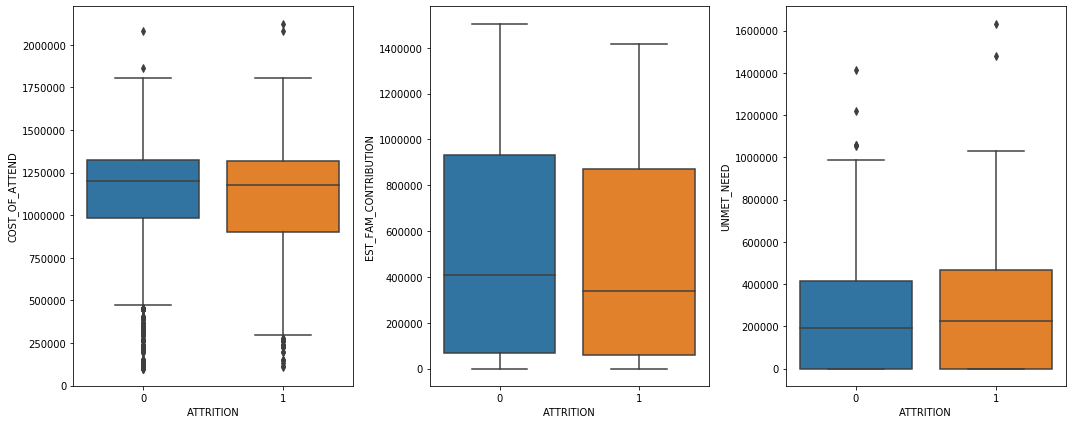

In [68]:
fig, axes = plt.subplots(1,3,figsize=(15, 6),sharex=True,tight_layout=True)
sns.boxplot(x='ATTRITION',y='COST_OF_ATTEND',data=df,orient='v',ax=axes[0])
sns.boxplot(x='ATTRITION',y='EST_FAM_CONTRIBUTION',data=df,orient='v',ax=axes[1])
sns.boxplot(x='ATTRITION',y='UNMET_NEED',data=df,orient='v',ax=axes[2])


In [69]:
iqr=df['UNMET_NEED'].quantile(.75)-df['UNMET_NEED'].quantile(.25)
q3=df['UNMET_NEED'].quantile(.75)
edge=q3+(1.5*iqr)
df[df['UNMET_NEED']>edge][['EST_FAM_CONTRIBUTION','COST_OF_ATTEND','UNMET_NEED']].sort_values('UNMET_NEED',ascending=False)


,EST_FAM_CONTRIBUTION,COST_OF_ATTEND,UNMET_NEED
3214,88200.0,1804860.0,1632660.0
2865,0.0,2124900.0,1478400.0
3353,137220.0,1862040.0,1414320.0
100,0.0,1504980.0,1216980.0


UNMET_NEED has valid outliers

In [70]:
len(df[(df['COST_OF_ATTEND']-df['EST_FAM_CONTRIBUTION'])<df['UNMET_NEED']])

0

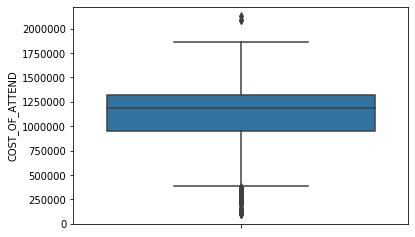

In [71]:
sns.boxplot(y='COST_OF_ATTEND',data=df,orient='v')

In [72]:
q3=df['COST_OF_ATTEND'].quantile(.75)
q1=df['COST_OF_ATTEND'].quantile(.25)
iqr=q3-q1
edge1=q1-(1.5*iqr)
edge2=q3+(1.5*iqr)
display(df[df['COST_OF_ATTEND']>edge2][['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','COST_OF_ATTEND','UNMET_NEED']].sort_values('COST_OF_ATTEND',ascending=False))
display(df[df['COST_OF_ATTEND']<edge1][['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','COST_OF_ATTEND','UNMET_NEED']].sort_values('COST_OF_ATTEND',ascending=False))


,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,COST_OF_ATTEND,UNMET_NEED
2865,2124900.0,0.0,2124900.0,1478400.0
1588,857580.0,1225320.0,2082900.0,647580.0
1829,1933800.0,149100.0,2082900.0,749040.0


,GROSS_FIN_NEED,EST_FAM_CONTRIBUTION,COST_OF_ATTEND,UNMET_NEED
2783,0.0,372600.0,372600.0,0.0
2137,0.0,369000.0,369000.0,0.0
1799,141720.0,227280.0,369000.0,NaN
778,329040.0,31140.0,360180.0,233580.0
814,289800.0,70380.0,360180.0,NaN
...,...,...,...,...
769,NaN,NaN,108960.0,0.0
1082,NaN,NaN,108240.0,0.0
3264,NaN,NaN,99720.0,0.0
2500,NaN,NaN,99720.0,0.0


There are 209(bottom) & 3(top) outliers

#### **Missing values treatment**

In [73]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_NAME_6_F        3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_NAME_2_S         439
CORE_COURSE_NAME_3_S        1038
CORE_COURSE_NAME_4_S        2045
CORE_COURSE_NAME_5_S        2950
CORE_COURSE_NAME_6_S        3319
HOUSING_STS                    0
DISTANCE_FROM_HOME            25
HIGH_SCHL_GPA                 53
HIGH_SCHL_NAME                 0
DEGREE_GROUP_CD                0
DEGREE_GRO

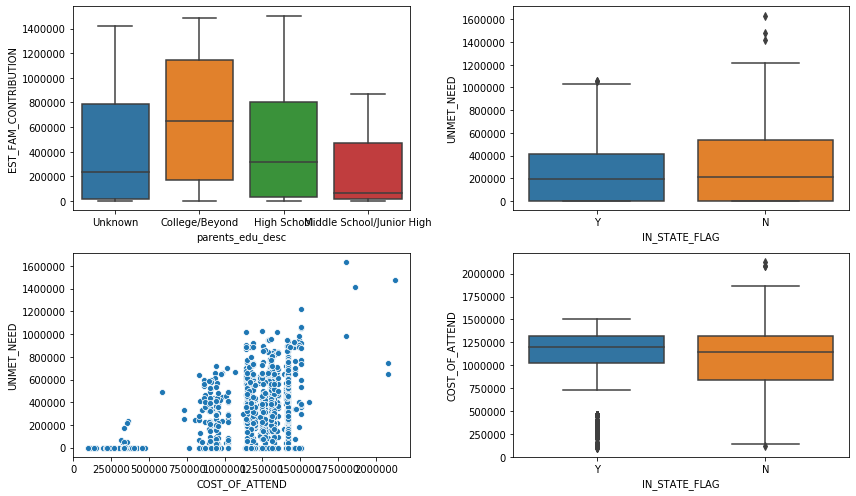

In [74]:
fig, axes=plt.subplots(2,2,figsize=(12,7),tight_layout=True)
sns.boxplot(y='EST_FAM_CONTRIBUTION',x='parents_edu_desc',data=df,ax=axes[0,0])
sns.boxplot(y='UNMET_NEED',x='IN_STATE_FLAG',data=df,ax=axes[0,1])
sns.scatterplot(y='UNMET_NEED',x='COST_OF_ATTEND',data=df,ax=axes[1,0])
sns.boxplot(y='COST_OF_ATTEND',x='IN_STATE_FLAG',data=df,ax=axes[1,1])

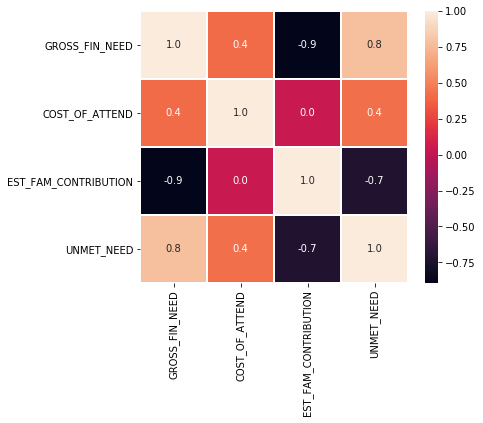

In [75]:
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df[['GROSS_FIN_NEED','COST_OF_ATTEND','EST_FAM_CONTRIBUTION','UNMET_NEED']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

After cleaning financial indicators, we can take a look at correlation between them -
1. gross fin need is highly correlated with family contribution & unmet need.
2. family contribution is again highly correlated with unmet need.
3. So, let's keep only COST_OF_ATTEND & UNMET_NEED

Substituting UNMET_NEED by median with respect to PARENT_EDU_DESC

In [76]:
len(df[(df['UNMET_NEED'].isnull())&(df['COST_OF_ATTEND'].notnull())&(df['GROSS_FIN_NEED'].notnull())][['GROSS_FIN_NEED','EST_FAM_CONTRIBUTION','COST_OF_ATTEND','UNMET_NEED']])

34

In [77]:
df.loc[(df['UNMET_NEED'].isnull())&(df['COST_OF_ATTEND'].notnull())&(df['GROSS_FIN_NEED'].notnull()),'UNMET_NEED']=df['GROSS_FIN_NEED']

#### **Transforming COST_OF_ATTEND & UNMET NEED variables to categorical variable since it contains lot of missing values**

In [78]:
pd.set_option('float_format', '{:f}'.format)
df['COST_OF_ATTEND'].describe()

count      1721.000000
mean    1089607.181871
std      374357.228022
min       99720.000000
25%      945840.000000
50%     1189920.000000
75%     1324500.000000
max     2124900.000000
Name: COST_OF_ATTEND, dtype: float64

In [79]:
def fun(x):
    if x>=1324500:
        return 'too_high'
    elif x>=1189920:
        return 'high'
    elif x>=945840:
        return 'average'
    elif x>=99720:
        return 'low'
    else:
        return 'unknown'
df['COST_OF_ATTEND']=df['COST_OF_ATTEND'].apply(fun)
df['COST_OF_ATTEND'].value_counts()

unknown     1679
too_high     481
average      457
high         393
low          390
Name: COST_OF_ATTEND, dtype: int64

In [80]:
df['UNMET_NEED'].describe()

count      1704.000000
mean     249769.265141
std      266939.055377
min           0.000000
25%           0.000000
50%      198840.000000
75%      422880.000000
max     1632660.000000
Name: UNMET_NEED, dtype: float64

In [81]:
print(df['UNMET_NEED'].quantile(.4))

57312.00000000007


In [82]:
def fun(x):
    if x>=422880:
        return 'too_high'
    elif x>=198840:
        return 'high'
    elif x>=57312:
        return 'average'
    elif x>0:
        return 'low'
    elif x==0:
        return 'zero'
    else:
        return 'unknown'
    
df['UNMET_NEED']=df['UNMET_NEED'].apply(fun)
df['UNMET_NEED'].value_counts()

unknown     1696
zero         633
high         427
too_high     426
average      169
low           49
Name: UNMET_NEED, dtype: int64

In [83]:
df['HIGH_SCHL_GPA'].describe()

count   3347.000000
mean       3.202738
std        0.455337
min        0.000000
25%        2.870000
50%        3.200000
75%        3.560000
max        4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [84]:
df.loc[(df['HIGH_SCHL_GPA'].isnull()),'HIGH_SCHL_GPA']=df['HIGH_SCHL_GPA'].mean()

In [85]:
df['SECOND_TERM_EARNED_HRS'].describe()

count   3191.000000
mean      12.511125
std        3.470492
min        0.000000
25%       11.000000
50%       13.000000
75%       15.000000
max       23.000000
Name: SECOND_TERM_EARNED_HRS, dtype: float64

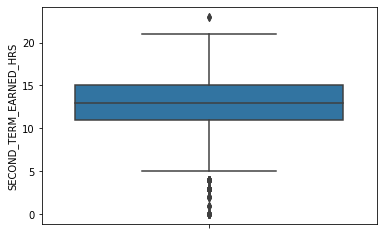

In [86]:
sns.boxplot(y='SECOND_TERM_EARNED_HRS',data=df)

In [87]:
q3=df['SECOND_TERM_EARNED_HRS'].quantile(.75)
q1=df['SECOND_TERM_EARNED_HRS'].quantile(.25)
iqr=q3-q1
edge1=q1-(1.5*iqr)
edge2=q3+(1.5*iqr)
print('outliers above the upper whisker - ',len(df[df['SECOND_TERM_EARNED_HRS']>edge2][['SECOND_TERM_EARNED_HRS']].sort_values('SECOND_TERM_EARNED_HRS',ascending=False)))
print('outliers below the lower whisker - ',len(df[df['SECOND_TERM_EARNED_HRS']<edge1][['SECOND_TERM_EARNED_HRS']].sort_values('SECOND_TERM_EARNED_HRS',ascending=False)))


outliers above the upper whisker -  2
outliers below the lower whisker -  113


In [88]:
df.loc[(df['SECOND_TERM_EARNED_HRS'].isnull()),'SECOND_TERM_EARNED_HRS']=df['SECOND_TERM_EARNED_HRS'].median()

In [89]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,ATTRITION,grade_sem1,grade_sem2,parents_edu_cd,parents_edu_desc
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,nan,1150.000000,...,14.000000,nan,unknown,nan,unknown,1,5.000000,5.000000,4.000000,Unknown
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.000000,nan,...,18.000000,570000.000000,too_high,785760.000000,too_high,0,5.000000,5.000000,3.000000,College/Beyond
2,7847538,18,M,BGD 1,Y,N,education,N,nan,1020.000000,...,14.000000,nan,unknown,nan,unknown,0,5.000000,5.000000,3.000000,College/Beyond
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,nan,1210.000000,...,14.000000,nan,unknown,nan,unknown,0,5.000000,5.000000,3.000000,College/Beyond
4,7962680,18,F,BGD 1,Y,N,arts,N,nan,1200.000000,...,12.000000,835920.000000,too_high,519840.000000,high,0,5.000000,5.000000,2.000000,High School


In [90]:
df['CORE_COURSE_NAME_3_F'].unique()

array(['language', 'ITDS', 'so_sci', nan, 'science', 'arts'], dtype=object)

In [91]:
df.loc[(df['CORE_COURSE_NAME_2_F'].isnull()),'CORE_COURSE_NAME_2_F']='none'
df.loc[(df['CORE_COURSE_NAME_3_F'].isnull()),'CORE_COURSE_NAME_3_F']='none'
df.loc[(df['CORE_COURSE_NAME_4_F'].isnull()),'CORE_COURSE_NAME_4_F']='none'
df.loc[(df['CORE_COURSE_NAME_5_F'].isnull()),'CORE_COURSE_NAME_5_F']='none'
df.loc[(df['CORE_COURSE_NAME_6_F'].isnull()),'CORE_COURSE_NAME_6_F']='none'


In [92]:
df.loc[(df['CORE_COURSE_NAME_1_S'].isnull()),'CORE_COURSE_NAME_1_S']='missing'
df.loc[(df['CORE_COURSE_NAME_1_S']=='missing'),'CORE_COURSE_NAME_2_S']='missing'
df.loc[(df['CORE_COURSE_NAME_1_S']=='missing'),'CORE_COURSE_NAME_3_S']='missing'
df.loc[(df['CORE_COURSE_NAME_1_S']=='missing'),'CORE_COURSE_NAME_4_S']='missing'
df.loc[(df['CORE_COURSE_NAME_1_S']=='missing'),'CORE_COURSE_NAME_5_S']='missing'
df.loc[(df['CORE_COURSE_NAME_1_S']=='missing'),'CORE_COURSE_NAME_6_S']='missing'



df.loc[(df['CORE_COURSE_NAME_2_S'].isnull()),'CORE_COURSE_NAME_2_S']='none'
df.loc[(df['CORE_COURSE_NAME_3_S'].isnull()),'CORE_COURSE_NAME_3_S']='none'
df.loc[(df['CORE_COURSE_NAME_4_S'].isnull()),'CORE_COURSE_NAME_4_S']='none'
df.loc[(df['CORE_COURSE_NAME_5_S'].isnull()),'CORE_COURSE_NAME_5_S']='none'
df.loc[(df['CORE_COURSE_NAME_6_S'].isnull()),'CORE_COURSE_NAME_6_S']='none'


In [93]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_NAME_2_F           0
CORE_COURSE_NAME_3_F           0
CORE_COURSE_NAME_4_F           0
CORE_COURSE_NAME_5_F           0
CORE_COURSE_NAME_6_F           0
SECOND_TERM                    0
CORE_COURSE_NAME_1_S           0
CORE_COURSE_NAME_2_S           0
CORE_COURSE_NAME_3_S           0
CORE_COURSE_NAME_4_S           0
CORE_COURSE_NAME_5_S           0
CORE_COURSE_NAME_6_S           0
HOUSING_STS                    0
DISTANCE_FROM_HOME            25
HIGH_SCHL_GPA                  0
HIGH_SCHL_NAME                 0
DEGREE_GROUP_CD                0
DEGREE_GRO

In [94]:
drop_cols=['STDNT_AGE',
'STDNT_GENDER',
'INTERNATIONAL_STS',
'HIGH_SCHL_NAME',
'DEGREE_GROUP_DESC',
'STDNT_TEST_ENTRANCE1',
'STDNT_TEST_ENTRANCE2',
'SECOND_TERM',
'STDNT_TEST_ENTRANCE_COMB',
'DISTANCE_FROM_HOME',
'DEGREE_GROUP_CD',
'FIRST_TERM_ATTEMPT_HRS',
'SECOND_TERM_ATTEMPT_HRS',
'HIGH_SCHL_GPA',
'GROSS_FIN_NEED',
'EST_FAM_CONTRIBUTION',
'parents_edu_cd',
'STDNT_MINOR',
'STUDENT IDENTIFIER'
]
df.drop(columns=drop_cols,inplace=True)

In [95]:
df.isnull().sum()

STDNT_BACKGROUND          0
IN_STATE_FLAG             0
STDNT_MAJOR               0
FIRST_TERM                0
CORE_COURSE_NAME_1_F      0
CORE_COURSE_NAME_2_F      0
CORE_COURSE_NAME_3_F      0
CORE_COURSE_NAME_4_F      0
CORE_COURSE_NAME_5_F      0
CORE_COURSE_NAME_6_F      0
CORE_COURSE_NAME_1_S      0
CORE_COURSE_NAME_2_S      0
CORE_COURSE_NAME_3_S      0
CORE_COURSE_NAME_4_S      0
CORE_COURSE_NAME_5_S      0
CORE_COURSE_NAME_6_S      0
HOUSING_STS               0
FIRST_TERM_EARNED_HRS     0
SECOND_TERM_EARNED_HRS    0
COST_OF_ATTEND            0
UNMET_NEED                0
ATTRITION                 0
grade_sem1                0
grade_sem2                0
parents_edu_desc          0
dtype: int64

In [96]:
df['FIRST_TERM']=df['FIRST_TERM'].astype('category')

# Model Building

In [97]:
X=df.drop('ATTRITION',axis=1)

In [98]:
y=df['ATTRITION']

In [99]:
X=pd.get_dummies(X)

In [100]:
X.columns.tolist()

['FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_EARNED_HRS',
 'grade_sem1',
 'grade_sem2',
 'STDNT_BACKGROUND_BGD 1',
 'STDNT_BACKGROUND_BGD 2',
 'STDNT_BACKGROUND_BGD 3',
 'STDNT_BACKGROUND_BGD 4',
 'STDNT_BACKGROUND_BGD 5',
 'STDNT_BACKGROUND_BGD 6',
 'STDNT_BACKGROUND_BGD 7',
 'STDNT_BACKGROUND_BGD 8',
 'IN_STATE_FLAG_N',
 'IN_STATE_FLAG_Y',
 'STDNT_MAJOR_Undeclared',
 'STDNT_MAJOR_accel',
 'STDNT_MAJOR_arts',
 'STDNT_MAJOR_business',
 'STDNT_MAJOR_education',
 'STDNT_MAJOR_nursing',
 'FIRST_TERM_200508',
 'FIRST_TERM_200608',
 'FIRST_TERM_200708',
 'FIRST_TERM_200808',
 'FIRST_TERM_200908',
 'FIRST_TERM_201008',
 'CORE_COURSE_NAME_1_F_ITDS',
 'CORE_COURSE_NAME_1_F_arts',
 'CORE_COURSE_NAME_1_F_language',
 'CORE_COURSE_NAME_1_F_science',
 'CORE_COURSE_NAME_1_F_so_sci',
 'CORE_COURSE_NAME_2_F_ITDS',
 'CORE_COURSE_NAME_2_F_arts',
 'CORE_COURSE_NAME_2_F_language',
 'CORE_COURSE_NAME_2_F_none',
 'CORE_COURSE_NAME_2_F_science',
 'CORE_COURSE_NAME_2_F_so_sci',
 'CORE_COURSE_NAME_3_F_ITDS',
 'CORE

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=200)

In [102]:
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV

### **Logistic Regression**

In [103]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(y_test, pred_logreg)

print(acc_logreg)

0.8014705882352942


### Extreme Gradient Boosting

In [104]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic",seed=250)
xg_clf.fit(X_train, y_train)
pred_xg = xg_clf.predict(X_test)
acc_xg = accuracy_score(y_test, pred_xg)

print(acc_xg)

0.7808823529411765


### **GBM**

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier(n_estimators=200,random_state=0)
gbm_clf.fit(X_train, y_train)
pred_gbm = xg_clf.predict(X_test)
acc_gbm = accuracy_score(y_test, pred_gbm)

print(acc_gbm)

0.7808823529411765


### **Random Forest Classifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=410,oob_score=True)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8058823529411765


In [107]:
for w in range(400,650,10):
    rf_clf=RandomForestClassifier(n_estimators=w,random_state=123)
    rf_clf.fit(X_train,y_train)
    score=rf_clf.score(X_test,y_test)
    print('For n_estimators = '+str(w))
    print('score is '+str(score))
    print('************************')

For n_estimators = 400
score is 0.8073529411764706
************************
For n_estimators = 410
score is 0.8073529411764706
************************
For n_estimators = 420
score is 0.8088235294117647
************************
For n_estimators = 430
score is 0.8073529411764706
************************
For n_estimators = 440
score is 0.8058823529411765
************************
For n_estimators = 450
score is 0.8102941176470588
************************
For n_estimators = 460
score is 0.8073529411764706
************************
For n_estimators = 470
score is 0.8088235294117647
************************
For n_estimators = 480
score is 0.8058823529411765
************************
For n_estimators = 490
score is 0.8102941176470588
************************
For n_estimators = 500
score is 0.8058823529411765
************************
For n_estimators = 510
score is 0.8058823529411765
************************
For n_estimators = 520
score is 0.8058823529411765
************************
For n_estima

best estimators count seemingly is 490. Running random forest with 490 estimators

In [108]:
rf_clf = RandomForestClassifier(n_estimators=490,oob_score=True)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.8132352941176471


In [109]:
model_performance = pd.DataFrame({
    "Model": ['Random Forest','Logistic Regression','XGBoost','Gradient boosting'],
    "Accuracy": [acc_rf, acc_logreg, acc_xg, acc_gbm]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,Random Forest,0.813235
1,Logistic Regression,0.801471
2,XGBoost,0.780882
3,Gradient boosting,0.780882


**Finalizing Random Forest Classifier**

In [110]:
pd.set_option('display.max_rows', None)

In [111]:
imp_feat=pd.Series(rf_clf.feature_importances_,index=X.columns.tolist())
imp_feat.sort_values(ascending=False)

grade_sem2                                   0.071167
grade_sem1                                   0.058158
SECOND_TERM_EARNED_HRS                       0.053395
FIRST_TERM_EARNED_HRS                        0.047138
CORE_COURSE_NAME_6_S_missing                 0.017980
CORE_COURSE_NAME_4_S_missing                 0.016525
CORE_COURSE_NAME_2_S_missing                 0.015137
CORE_COURSE_NAME_5_S_missing                 0.014627
CORE_COURSE_NAME_1_S_missing                 0.014581
CORE_COURSE_NAME_2_S_none                    0.014116
parents_edu_desc_High School                 0.012132
CORE_COURSE_NAME_1_S_so_sci                  0.012083
CORE_COURSE_NAME_1_F_so_sci                  0.011831
STDNT_MAJOR_education                        0.011782
CORE_COURSE_NAME_2_F_so_sci                  0.011458
CORE_COURSE_NAME_3_S_missing                 0.011433
CORE_COURSE_NAME_3_F_so_sci                  0.011424
parents_edu_desc_College/Beyond              0.011363
CORE_COURSE_NAME_4_F_none   

In [112]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)
print('The AUC for the model :',str(metrics.roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1])))
print('\n')
print('Confusion matrix :','\n',str(metrics.confusion_matrix(y_test,y_pred)))

The AUC for the model : 0.6667611988398323


Confusion matrix : 
 [[527   8]
 [119  26]]


1. True Negatives = 527
2. False Positives = 8
3. False Negatives = 119
4. True Positives = 26

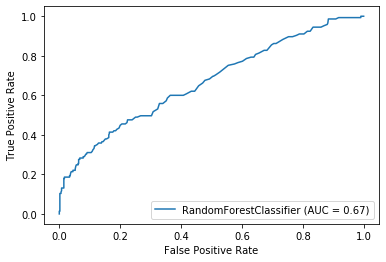

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf, X_test, y_test)

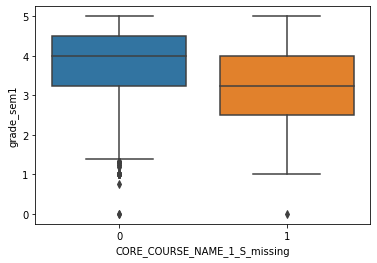

In [114]:
sns.boxplot(x='CORE_COURSE_NAME_1_S_missing',y='grade_sem1',data=X)

In above plot, we can see students tend to drop out after sem1 if their performance is low.

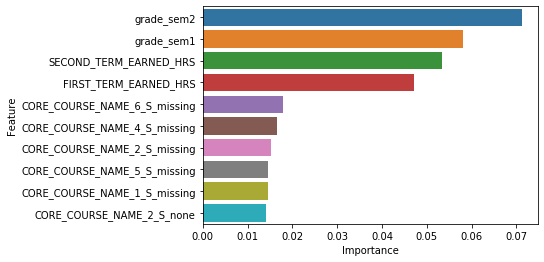

In [115]:
f=pd.Series(imp_feat,name='Importance')
f=f.to_frame().reset_index()
f=f.rename(columns={'index':'Feature'}).sort_values('Importance',ascending=False)
f1=f.head(10)
sns.barplot(y='Feature',x='Importance',data=f1)

**Key takeaways**
1. Student grades play crucial role in terms of attrition followed by students earned hours. Which means Performance record segment has upmost importance than any other segment.
2. Students who are missing in second semester; who may not have chosen any course in 2nd sem tend to leave more likely. This is happening with students who have lower performance in sem 1.
3. Parents education also seems to be an imporatant factor. Parents with higher education have higher propensity to contrubute more for students financial need. Moreover, cost of attend has increased year on year from 2005 to 2009.